# Visualizing Earnings Based On College Majors


We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on 
their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).


## Dataset
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

|**Header** | **Definition** |
|:------------:| :---          |
|`Rank`     |  Rank by median earnings (the dataset is ordered by this column)
|`Major_code`| Major code |
|`Major`     | Major description |
|`Major_category` | Category of major |
|`Total` | Total number of people with major |
|`Sample_size` | Sample size (unweighted) of full-time |
|`Men` | Male graduates |
|`Women` | Female graduates |
|`ShareWomen` | Women as share of total |
|`Employed` | Number employed |
|`Median` | Median salary of full-time, year-round workers |
|`Low_wage_jobs` | Number in low-wage service jobs |
|`Full_time` | Number employed 35 hours or more |
|`Part_time` | Number employed less than 35 hours |


## Getting Started

First we'll start by importing some packages we'll use and then import the data.

The Jupyter magic function '% matplotlib inline' will make the plots appear and be stored in the notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')

Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors. Let's use `DataFrame.dropna()` to drop rows containing missing values and assign the resulting DataFrame back to recent_grads.

If you compare `cleaned_data_count` and `raw_data_count`, you'll notice that only one row contained missing values and was dropped.

In [2]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count)
print(cleaned_data_count)

173
172


# Analysis

Let's explore the data and answer some questions!

## Do students in more popular majors make more money?

Text(0.5,1,'Sample Size vs. Median')

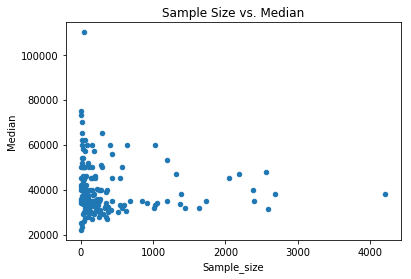

In [3]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample Size vs. Median')

The data shows that majoring in a more popular major does not garner a higher median salary. Although the lower sample sizes of some majors are not reflective of recent American graduates as a whole.

## Do students that majored in subjects that were majority female make more money?

Text(0.5,1,'Women as Share of Total vs. Median')

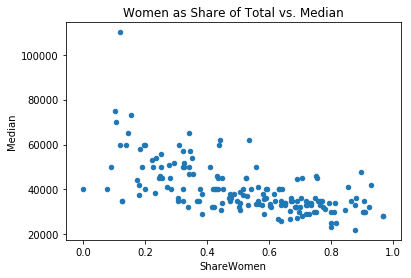

In [4]:
ax = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax.set_title('Women as Share of Total vs. Median')

Here the data shows a weak negative correlation between percentage of women in a major and median salary.

## Is there a link between the number of full-time employees and median salary?

Text(0.5,1,'Number of Full-time Employees vs. Median')

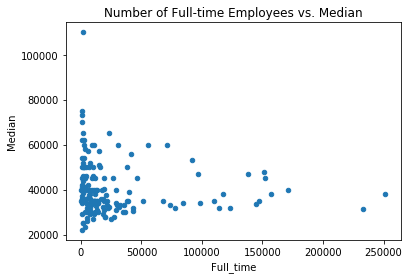

In [5]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Number of Full-time Employees vs. Median')

There does not appear to be a link between a nominally employable field and earning a higher salary.



## Earnings, Unemployment and Gender Breakdown
Now let's create histograms and explore the distributions of the following columns.
 - `ShareWomnen`
 - `Unemployment_rate`
 - `P75th` - 75th percentile of earnings

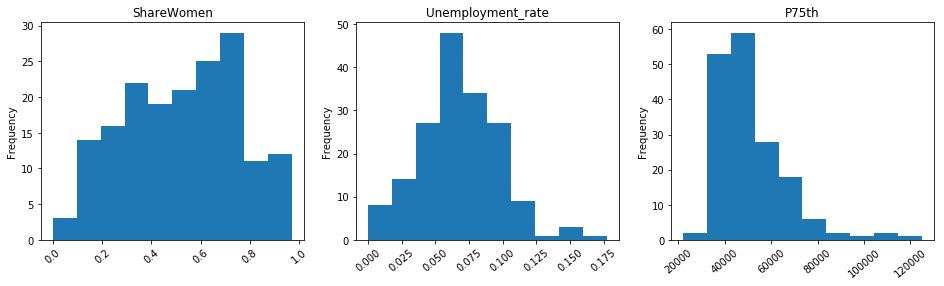

In [6]:
cols = ['Sample_size', 'ShareWomen', 'Unemployment_rate', 'P75th']
fig = plt.figure(figsize=(16,4))
for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax = recent_grads[cols[i]].plot(kind='hist', rot=40)
    ax.set_title(cols[i])

In the left histogram roughly half of all majors are predominately female. 

The middle histogram is almost symmetrical with 5% unemployment most commonly found. 

In the right histogram the distribution is skewed right, with almost 1/3 of top earners in their respective majors earning more than $50,000.

## Which category of majors have the most students?
Using bar and box plots, let's find out what `Major_category` is most popular and view the categories in greater detail.

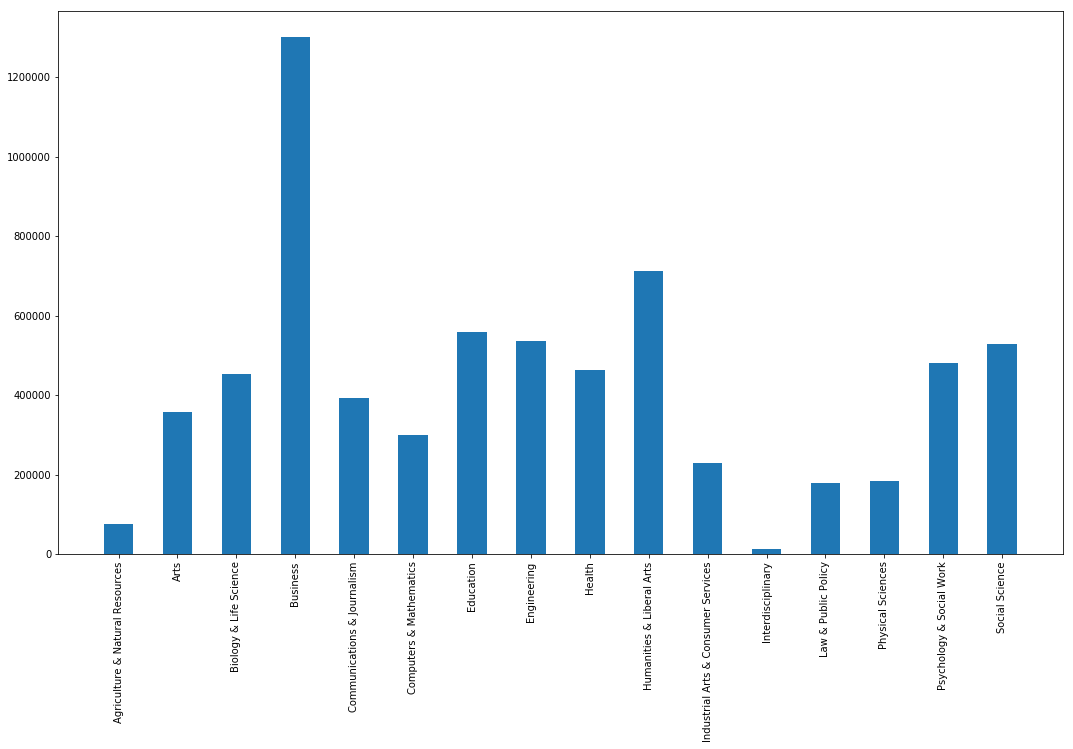

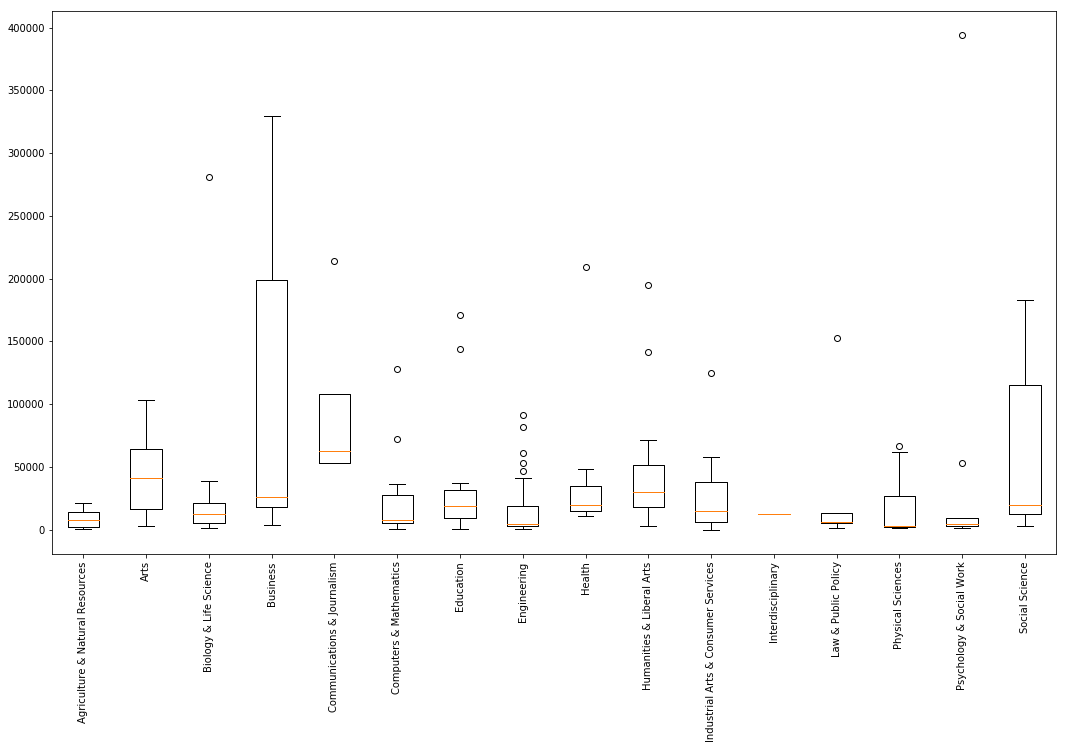

Agriculture & Natural Resources: ANIMAL SCIENCES - 21573.0
Arts: COMMERCIAL ART AND GRAPHIC DESIGN - 103480.0
Biology & Life Science: BIOLOGY - 280709.0
Business: BUSINESS MANAGEMENT AND ADMINISTRATION - 329927.0
Communications & Journalism: COMMUNICATIONS - 213996.0
Computers & Mathematics: COMPUTER SCIENCE - 128319.0
Education: ELEMENTARY EDUCATION - 170862.0
Engineering: MECHANICAL ENGINEERING - 91227.0
Health: NURSING - 209394.0
Humanities & Liberal Arts: ENGLISH LANGUAGE AND LITERATURE - 194673.0
Industrial Arts & Consumer Services: PHYSICAL FITNESS PARKS RECREATION AND LEISURE - 125074.0
Interdisciplinary: MULTI/INTERDISCIPLINARY STUDIES - 12296.0
Law & Public Policy: CRIMINAL JUSTICE AND FIRE PROTECTION - 152824.0
Physical Sciences: CHEMISTRY - 66530.0
Psychology & Social Work: PSYCHOLOGY - 393735.0
Social Science: POLITICAL SCIENCE AND GOVERNMENT - 182621.0


In [7]:
# Creates a bar plot
major_cat_cols = sorted(recent_grads['Major_category'].unique())
major_cat_bar = []

for c in major_cat_cols:
    major_cat_bar.append(sum(recent_grads[recent_grads['Major_category'] == c]['Total'].values))
    
plt.figure(figsize=(18,10))
plt.bar(major_cat_cols, major_cat_bar, width=0.5)
plt.xticks(rotation=90)
plt.show()


# Creates a box plot
fig = plt.figure(1, figsize=(18, 10))
ax = fig.add_subplot(111)
major_cat_box = []

for c in major_cat_cols:
    major_cat_box.append(recent_grads[recent_grads['Major_category'] == c]['Total'].values)

ax.boxplot(major_cat_box, widths=0.5)
ax.set_xticklabels(major_cat_cols, rotation=90)
plt.show()

# Displays the each major category and its most popular major
for c in major_cat_cols:
    max_people = max(recent_grads[recent_grads['Major_category'] == c]['Total'].values)
    max_major = recent_grads[recent_grads['Total'] == max_people]['Major'].values[0]
    print(c + ': ' + max_major + ' - ' + str(max_people))

## Findings
The most popular major category is `Business` by a wide margin. However, it was not home to the most popular major. That title is held by `Psychology & Social Work` where the Psychology major is the main factor behind its category's popularity.